In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('predictions.csv')
df

,id,tweet,true_label,bert_label,gpt_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT,NOT
...,...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,OFF,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,OFF,NOT


In [3]:
df2 = pd.read_csv('predictions_svm_stems.csv')
df3 = pd.read_csv('predictions_svm_stems_other.csv')
df['svm_stems_label'] = df2['trad_label']
df['svm_stems_other_label'] = df3['trad_label']
df

,id,tweet,true_label,bert_label,gpt_label,svm_stems_label,svm_stems_other_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT,OFF,OFF,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT,NOT,NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT,NOT,OFF,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT,NOT,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT,NOT,NOT,NOT
...,...,...,...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT,NOT,OFF,OFF
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT,NOT,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,OFF,OFF,OFF,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,OFF,NOT,OFF,OFF


In [4]:
le = LabelEncoder()
y_true = le.fit_transform(df.true_label.values)

In [5]:
X = df['tweet'].values
y = y_true
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
y_pred_dummy = dummy_clf.predict(X)

In [11]:
print(classification_report(y_true, y_pred_dummy, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.7209    1.0000    0.8378       620
           1     0.0000    0.0000    0.0000       240

    accuracy                         0.7209       860
   macro avg     0.3605    0.5000    0.4189       860
weighted avg     0.5197    0.7209    0.6040       860



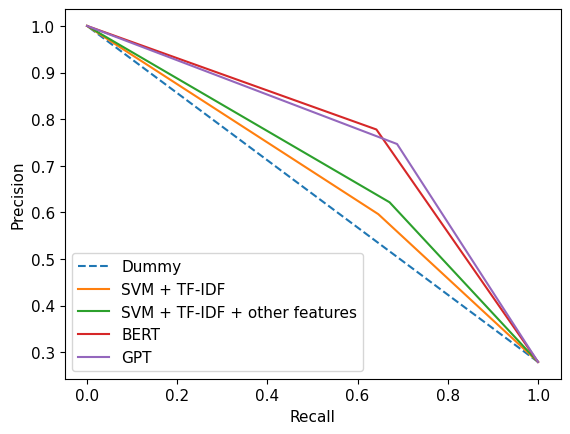

In [20]:
plt.rcParams.update({'font.size': 11})

columns = ['svm_stems_label', 'svm_stems_other_label', 'bert_label', 'gpt_label']
model_names = ['SVM + TF-IDF', 'SVM + TF-IDF + other features', 'BERT', 'GPT']

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_dummy)
plt.plot(recall, precision, label='Dummy', linestyle='dashed')

for i in range(len(columns)):
    y_pred = le.fit_transform(df[columns[i]].values)
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, label=model_names[i])
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [13]:
def plot_conf_matrix(y_true, y_pred):
    plt.rcParams.update({'font.size': 20})
    cm = confusion_matrix(y_true, y_pred)
    class_names = le.classes_ # name  of classes
    fig, ax = plt.subplots()
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g', ax=ax)
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label');

SVM + TF-IDF
              precision    recall  f1-score   support

         NOT     0.8583    0.8306    0.8443       620
         OFF     0.5962    0.6458    0.6200       240

    accuracy                         0.7791       860
   macro avg     0.7272    0.7382    0.7321       860
weighted avg     0.7852    0.7791    0.7817       860


accuracy: 0.7790697674418605
macro F1: 0.7321311475409836
weighted F1: 0.7816774685474647



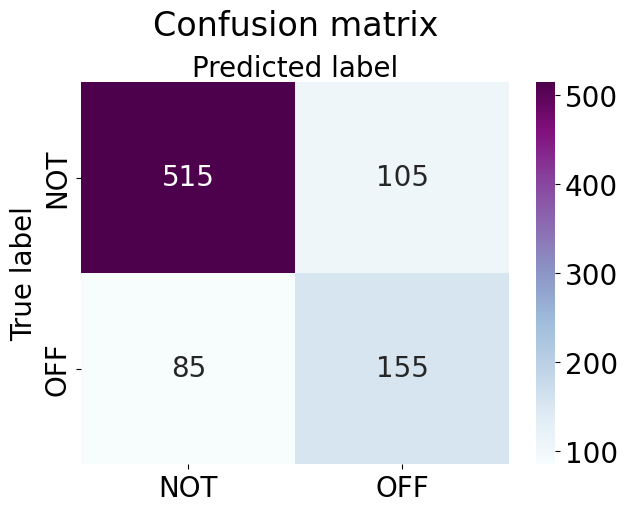


SVM + TF-IDF + other features
              precision    recall  f1-score   support

         NOT     0.8686    0.8419    0.8550       620
         OFF     0.6216    0.6708    0.6453       240

    accuracy                         0.7942       860
   macro avg     0.7451    0.7564    0.7502       860
weighted avg     0.7996    0.7942    0.7965       860


accuracy: 0.7941860465116279
macro F1: 0.7501637180995899
weighted F1: 0.7965030111648931



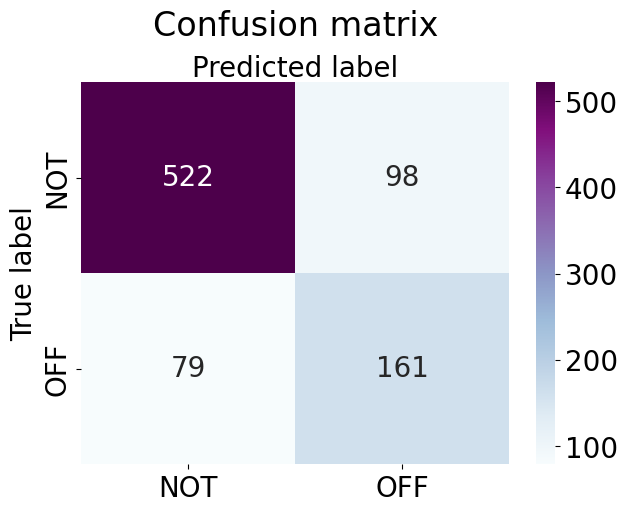


BERT
              precision    recall  f1-score   support

         NOT     0.8701    0.9290    0.8986       620
         OFF     0.7778    0.6417    0.7032       240

    accuracy                         0.8488       860
   macro avg     0.8239    0.7853    0.8009       860
weighted avg     0.8443    0.8488    0.8441       860


accuracy: 0.8488372093023255
macro F1: 0.8008961454348585
weighted F1: 0.8440658237989284



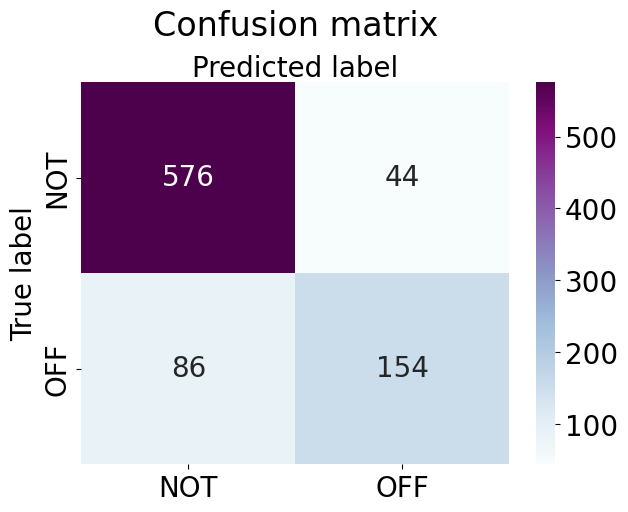


GPT
              precision    recall  f1-score   support

         NOT     0.8826    0.9097    0.8959       620
         OFF     0.7466    0.6875    0.7158       240

    accuracy                         0.8477       860
   macro avg     0.8146    0.7986    0.8059       860
weighted avg     0.8447    0.8477    0.8457       860


accuracy: 0.8476744186046512
macro F1: 0.8058921535012982
weighted F1: 0.8456847869330629



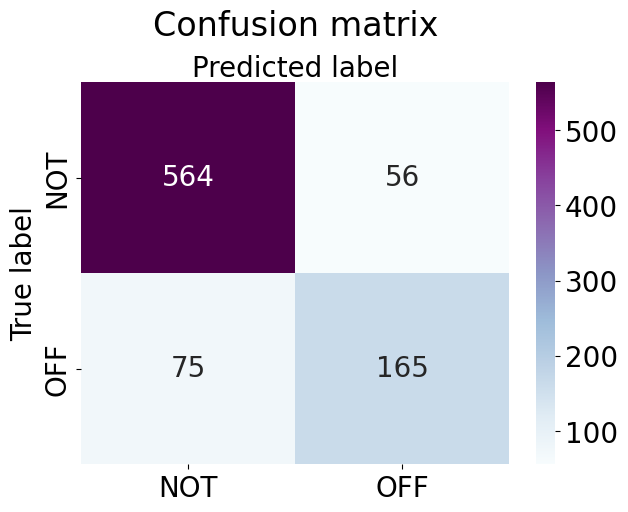

In [14]:
for i in range(len(columns)):
    print(model_names[i])
    y_pred = le.fit_transform(df[columns[i]].values)
    print(classification_report(y_true, y_pred, target_names=le.classes_, digits=4))
    print()
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("macro F1:", f1_score(y_true, y_pred, average='macro'))
    print("weighted F1:", f1_score(y_true, y_pred, average='weighted'))
    print()
    plot_conf_matrix(y_true, y_pred)
    plt.show()
    print()